### Date: 05/27/2015 10 pm

Based on Ted_3_response, make visualization of the labeling process. Approximation is used to facilitate the visualization

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import requests
from pattern import web
import random
from mpl_toolkits.mplot3d import Axes3D

In [46]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

### Read in training set

In [47]:
# read in the train set
train = pd.read_json('train.json')

In [48]:
train.reset_index(drop = True, inplace = True)

In [49]:
# select only the rating words
ratings = train.ix[:,:14]

In [50]:
ratings.shape

(1535, 14)

##reduce the dimension of the multi-class problem 

###1. Cluster talks based on the rating words, then look at the rating words distribution in each cluster 

In [51]:
ratings = ratings.fillna(0)

In [52]:
# normalize against total ratings one talk receives
ratingsum = ratings.sum(axis = 1)

In [53]:
ratingsum.min()

176.0

In [54]:
ratingwords = list(ratings.columns)

In [55]:
ratings = ratings[ratingwords].div(ratingsum,axis = 'index')

In [56]:
ratings['id'] = train['id']
ratings.set_index('id',inplace = True)

In [57]:
ratings.head()

,Beautiful,Confusing,Courageous,Fascinating,Funny,Informative,Ingenious,Inspiring,Jaw-dropping,Longwinded,OK,Obnoxious,Persuasive,Unconvincing
id,,,,,,,,,,,,,,
1,0.020121,0.020523,0.050704,0.040241,0.185111,0.154125,0.020121,0.143260,0.034205,0.038229,0.065996,0.046680,0.094567,0.086117
2,0.029782,0.000000,0.084712,0.091992,0.009927,0.156188,0.178028,0.285903,0.040371,0.009265,0.017869,0.001985,0.087359,0.006618
2167,0.015021,0.003577,0.019313,0.143777,0.010014,0.230329,0.173104,0.233190,0.016452,0.018598,0.037911,0.000715,0.077253,0.020744
3,0.047927,0.028497,0.159326,0.049223,0.011658,0.242228,0.034974,0.129534,0.037565,0.023316,0.054404,0.014249,0.129534,0.037565
99,0.137476,0.009416,0.022599,0.011299,0.431262,0.015066,0.077213,0.035782,0.009416,0.011299,0.131827,0.052731,0.024482,0.030132


In [58]:
ratingm = ratings.as_matrix()

In [59]:
ratingm.shape

(1535, 14)

### standardize ratingm along each column, so that different words have same variation

In [60]:
scaler = StandardScaler()

In [61]:
# scale ratingm along the feature columns, so that the low-freq words (negative ones) can have effects in variation
# ratingm_scaled = scale(ratingm)
scaler.fit(ratingm)
ratingm_scaled = scaler.transform(ratingm)

In [62]:
ratingm_scaled.std(axis=0)

array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [63]:
ratingm_scaled.shape

(1535, 14)

### Reduce dimension using PCA prior to clustering 

In [64]:
pca = PCA(n_components=6)
reduced = pca.fit_transform(ratingm_scaled)

In [65]:
print '{} variation has been explained by 10 components'.format(pca.explained_variance_ratio_.sum())

0.769517225361 variation has been explained by 10 components


###Find the right number of clusters 

In [22]:
n_cluster = xrange(1,21)

In [69]:
inertias = []
for num in n_cluster:
    clf0 = KMeans(n_clusters = num,n_init = 30)
    clf0.fit(reduced)
    print 'the inertia is {} for {} cluters'.format(clf0.inertia_,num)
    inertias.append(clf0.inertia_)

the inertia is 16536.925173 for 1 cluters
the inertia is 13236.7615876 for 2 cluters
the inertia is 10691.5017591 for 3 cluters
the inertia is 8936.8872785 for 4 cluters
the inertia is 7856.75113941 for 5 cluters
the inertia is 7203.48887492 for 6 cluters
the inertia is 6641.35019927 for 7 cluters
the inertia is 6156.29761181 for 8 cluters
the inertia is 5726.06103579 for 9 cluters
the inertia is 5413.3074286 for 10 cluters
the inertia is 5208.46684496 for 11 cluters
the inertia is 5013.48651299 for 12 cluters
the inertia is 4837.18677146 for 13 cluters
the inertia is 4659.3488964 for 14 cluters
the inertia is 4519.04158078 for 15 cluters
the inertia is 4399.01708551 for 16 cluters
the inertia is 4287.1767937 for 17 cluters
the inertia is 4167.62852595 for 18 cluters
the inertia is 4069.20639585 for 19 cluters
the inertia is 3984.06668052 for 20 cluters


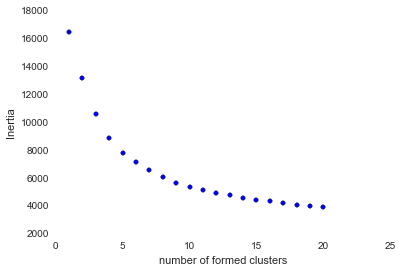

In [70]:
plt.scatter(x = n_cluster, y = inertias, marker = 'o')
plt.xlabel('number of formed clusters')
plt.ylabel('Inertia')

#### Choose 5 clusters, look at the centroids

In [66]:
clf = KMeans(n_clusters = 5,random_state=58)
clf.fit(reduced)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=5, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=58, tol=0.0001,
    verbose=0)

In [67]:
clf.inertia_

7856.7655740546452

In [68]:
len(clf.labels_)

1535

In [69]:
clf.labels_.shape

(1535,)

In [70]:
cents = clf.cluster_centers_

In [71]:
# get the original space
cents_ori = pca.inverse_transform(cents)

In [72]:
cents_ori.shape

(5, 14)

In [73]:
cents_ori_df = pd.DataFrame(cents_ori,columns = ratingwords)

In [74]:
cents_ori_df

,Beautiful,Confusing,Courageous,Fascinating,Funny,Informative,Ingenious,Inspiring,Jaw-dropping,Longwinded,OK,Obnoxious,Persuasive,Unconvincing
0,-0.133983,1.681879,-0.387545,-0.409344,-0.091982,-0.163219,-0.188585,-0.679744,-0.471393,1.540513,1.482173,1.508597,-0.313528,1.764300
1,-0.111145,-0.017545,-0.483754,-0.354059,2.855755,-0.483900,0.082932,-0.781062,-0.516253,-0.281881,0.392032,0.694257,-0.591778,-0.200147
2,0.740124,-0.436338,0.915741,-0.698998,-0.257976,-0.752308,-0.469947,1.144757,-0.154222,-0.305530,-0.447832,-0.239689,-0.037422,-0.408956
3,-0.618855,-0.122438,-0.128100,0.102013,-0.239660,0.994124,-0.340286,-0.286944,-0.346468,0.003399,0.091450,-0.235420,0.768114,0.027043
4,0.041569,-0.179791,-0.593103,1.038110,-0.180686,-0.199216,1.110354,-0.412677,1.064400,-0.355725,-0.476208,-0.392077,-0.653189,-0.404128


#### so the above five clusters indicate the following associations
0: (Confusing, Longwinded, OK, Obnoxious, Unconvincing)

1: (Funny)

2: (Beautiful,Courageous,Inspiring)

3: (Informative, Persuasive)

4: (Fascinating, Ingenious, Jaw-dropping)

#### For now, save labels as the response variable 

In [75]:
response = clf.labels_

In [76]:
response = pd.Series(response,index = train['id'])

In [77]:
rating_scaled = pd.DataFrame(ratingm_scaled,columns = ratings.columns,index = train['id'])

In [78]:
rating_scaled['label'] = response

In [79]:
rating_scaled.head()

,Beautiful,Confusing,Courageous,Fascinating,Funny,Informative,Ingenious,Inspiring,Jaw-dropping,Longwinded,OK,Obnoxious,Persuasive,Unconvincing,label
id,,,,,,,,,,,,,,,
1,-0.593682,0.406917,-0.144765,-1.179634,1.458288,-0.006550,-0.727892,-0.360693,-0.293417,0.567269,0.439305,1.405606,0.067081,1.228169,0
2,-0.482816,-0.714895,0.311939,-0.485821,-0.447487,0.013567,1.459210,0.970387,-0.198068,-0.503376,-0.837261,-0.606048,-0.031010,-0.657049,2
2167,-0.652200,-0.519398,-0.566324,0.208449,-0.446540,0.736481,1.391019,0.478495,-0.567972,-0.158399,-0.305640,-0.663215,-0.168540,-0.322072,3
3,-0.274580,0.842797,1.313960,-1.059222,-0.428658,0.852502,-0.522164,-0.488776,-0.241461,0.016003,0.131832,-0.054092,0.542923,0.076815,3
99,0.753058,-0.200198,-0.522201,-1.567655,4.136101,-1.362446,0.062866,-1.363623,-0.676782,-0.428188,2.185461,1.677937,-0.886681,-0.099449,1


####show the distance of each talk to the cluster centers 

In [80]:
tocenters = clf.transform(reduced)

In [81]:
tocenters = pd.DataFrame(tocenters, columns = [0,1,2,3,4])

In [82]:
tocenters['id'] = train['id']

In [83]:
tocenters.set_index('id',inplace = True)

In [84]:
response.head()

id
1       0
2       2
2167    3
3       3
99      1
dtype: int32

## 3D plot of clustering talks of three classes: rational, emotional and funny

####select a sub-dataframe from rating_scaled that contains only talks of classes 1,2,3 and rating words fractions of these three classes 

In [85]:
rating_small = rating_scaled.ix[rating_scaled.label.isin([1,2,3]),['Beautiful','Courageous','Funny',
                                                                       'Informative','Inspiring','Persuasive','label']]

In [86]:
rating_small.shape

(1004, 7)

In [87]:
rating_small.head()

,Beautiful,Courageous,Funny,Informative,Inspiring,Persuasive,label
id,,,,,,,
2,-0.482816,0.311939,-0.447487,0.013567,0.970387,-0.031010,2
2167,-0.652200,-0.566324,-0.446540,0.736481,0.478495,-0.168540,3
3,-0.274580,1.313960,-0.428658,0.852502,-0.488776,0.542923,3
99,0.753058,-0.522201,4.136101,-1.362446,-1.363623,-0.886681,1
1141,1.848161,0.434900,0.092355,-0.970521,0.068472,-0.574273,2


In [88]:
rating_small['Rational'] = rating_small['Informative'] + rating_small['Persuasive']

In [89]:
rating_small['Emotional'] = rating_small['Beautiful'] + rating_small['Courageous'] + rating_small['Inspiring']

In [90]:
rating_small.drop(['Courageous','Beautiful','Informative','Persuasive','Inspiring'],axis = 1,inplace = True)

In [91]:
rating_small.head()

,Funny,label,Rational,Emotional
id,,,,
2,-0.447487,2,-0.017443,0.799509
2167,-0.446540,3,0.567941,-0.740029
3,-0.428658,3,1.395425,0.550604
99,4.136101,1,-2.249127,-1.132767
1141,0.092355,2,-1.544794,2.351533


In [94]:
finallabels = ['Funny ("Funny")','Emotional ("Beautiful,Courageous,Inspiring")','Rational ("Informative,Persuasive")']

In [95]:
color_map = plt.cm.get_cmap('Set1')

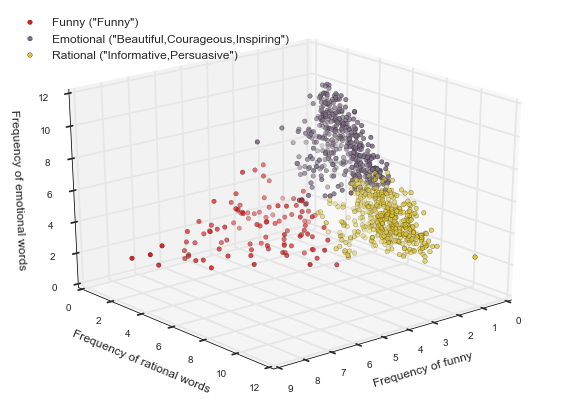

In [102]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection='3d')
for i in xrange(3):
    ratingsmall_plot = rating_small[rating_small.label == i+1]
    ax.scatter(ratingsmall_plot['Funny'],ratingsmall_plot['Rational'],ratingsmall_plot['Emotional'],
             c = color_map(float(i)/3),label = finallabels[i])
ax.legend(loc = 'upper left',fontsize = 12)
ax.set_xticklabels(['0','1','2','3','4','5','6','7','8','9'])
ax.set_yticklabels(['0','2','4','6','8','10','12'])
ax.set_zticklabels(['0','2','4','6','8','10','12'])
ax.set_xlabel('Frequency of funny',fontsize = 12);ax.set_ylabel('Frequency of rational words',fontsize = 12);
ax.set_zlabel('Frequency of emotional words',fontsize = 12)
ax.view_init(elev = 25., azim = 50.)

# ax.scatter3D(rating_small['Funny'],rating_small['Rational'],rating_small['Emotional'],c = rating_small.label,
            # zdir = 'y')

##### Notice that because the standardization was done with all talks, so these values sit at the high end of the normal distribution; low-end value talks are filtered out by selecting only class 1,2 and 3

### redo the scaling after selecting only class 1,2 and 3 talks

In [174]:
rating123 = ratings.ix[response.apply(lambda x: x in [1,2,3]),['Beautiful','Courageous','Funny',
                                                                       'Informative','Inspiring','Persuasive']]

In [176]:
rating123m = rating123.as_matrix()

####standard scaling: zero-mean and unity-variance

In [237]:
scaler2 = StandardScaler()

In [238]:
scaler2.fit(rating123m)
rating123m_scaled = scaler2.transform(rating123m)

In [239]:
rating123_scaled = pd.DataFrame(rating123m_scaled,columns = rating123.columns,index = rating123.index)

In [240]:
rating123_scaled['label'] = response

In [241]:
rating123_scaled.head()

,Beautiful,Courageous,Funny,Informative,Inspiring,Persuasive,label
id,,,,,,,
2,-0.484852,0.054467,-0.463621,-0.083289,0.658702,-0.311688,2
2167,-0.647948,-0.725443,-0.462795,0.580878,0.192748,-0.442930,3
3,-0.284346,0.944276,-0.447193,0.687470,-0.723518,0.236001,3
99,0.705146,-0.686261,3.535511,-1.347479,-1.552235,-1.128233,1
1141,1.759598,0.163659,0.007386,-0.987405,-0.195654,-0.830109,2


In [242]:
rating123_scaled['Rational'] = rating123_scaled['Informative'] + rating123_scaled['Persuasive']

In [243]:
rating123_scaled['Emotional'] = rating123_scaled['Beautiful'] + rating123_scaled['Courageous'] + rating123_scaled['Inspiring']

In [244]:
rating123_scaled.drop(['Courageous','Beautiful','Informative','Persuasive','Inspiring'],axis = 1,inplace = True)

In [245]:
rating123_scaled.head()

,Funny,label,Rational,Emotional
id,,,,
2,-0.463621,2,-0.394977,0.228317
2167,-0.462795,3,0.137948,-1.180643
3,-0.447193,3,0.923471,-0.063588
99,3.535511,1,-2.475712,-1.533349
1141,0.007386,2,-1.817514,1.727602


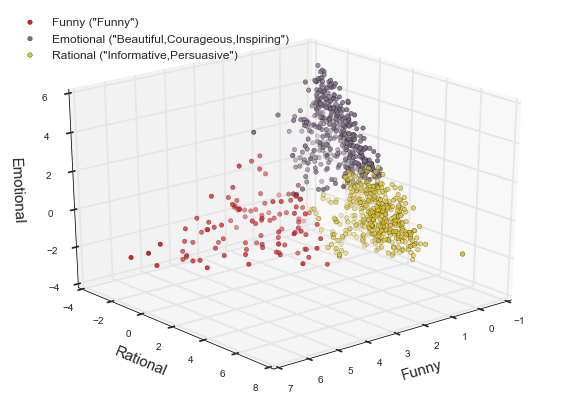

In [289]:
fig = plt.figure(figsize = (10,7))

ax = fig.add_subplot(111, projection='3d')
for i in xrange(3):
    rating_toplot = rating123_scaled[rating123_scaled.label == i+1]
    ax.scatter(rating_toplot['Funny'],rating_toplot['Rational'],rating_toplot['Emotional'],
             c = color_map(float(i)/3),label = finallabels[i]
            )
# ax.set_ylim3d(-4,4)
ax.legend(loc = 'upper left',fontsize = 12)
ax.set_xlabel('Funny',fontsize = 15);ax.set_ylabel('Rational',fontsize = 15);ax.set_zlabel('Emotional',
                                                                                          fontsize = 15)
ax.view_init(elev = 25., azim = 50.)